# Selfish Trajectory Optimization

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath('..'))
from cav_game.dynamics.car import DoubleIntegratorDynamics
from cav_game.maneuvers.selfish import SelfishManeuver

### 1. Define Parameters

In [13]:

# Vehicle i initial conditions
x0 = 0       # Vehicle i initial x position [m]
v0 = 17      # Vehicle i initial velocity [m/s]
X0 = np.array([x0, v0])
# Obstacle i initial conditions
x0_obst = 14; # Obstacle i initial x position [m]
v0_obst = 16;  # Obstacle i initial velocity [m/s]
X0_obst = np.array([x0_obst, v0_obst])
# Obstacle location descriptor
obstacles = {"front": X0_obst}
# Construct optimization parameters
maneuver_params = {"cav_type":"CAVC","alpha_time": 0.2, "alpha_control":0.1, "alpha_speed":0.7, "n":100}
# Construct vehicle model
veh_params = {}
cav_model = DoubleIntegratorDynamics(veh_params)
# Construct maneuver
long_maneuver = SelfishManeuver(cav_model, x0 =  X0, x0_obst=obstacles, params = maneuver_params)


### 3. Compute CAVC Trajectory

/home/aschavez/Drive/PhD/Research/CODES/CAV-Game/cav_game/maneuvers/maneuver.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


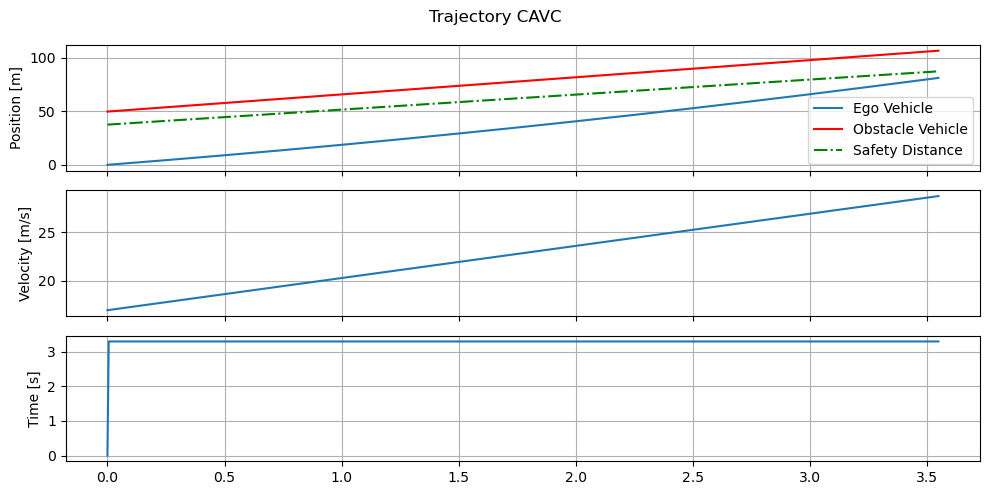

In [14]:
traj = long_maneuver.compute_longitudinal_trajectory(obstacle=True)

### 4. Relax Terminal Time and compute new trajectory

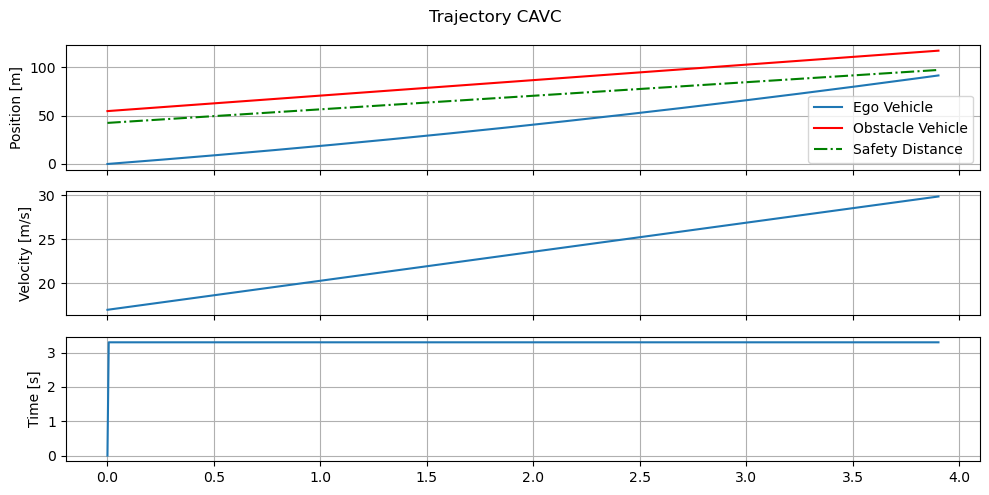

In [15]:
# Extract previous terminal time
tf = traj['t'][-1]
traj = long_maneuver.relax_terminal_time(time=tf*1.1,obstacle=True)